<a href="https://colab.research.google.com/github/anisha99999/DNNs/blob/master/Session4_ninth_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [2]:
transform = transforms.Compose ([transforms.ToTensor()])

trainset = MNIST (root = '/content/data/', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader (trainset, batch_size = 64, shuffle = True, num_workers = 2)

testset = MNIST (root = '/content/data/', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader (testset, batch_size = 64, shuffle = False, num_workers = 2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
dataiter = iter (trainloader)
images, labels = dataiter.next ()
print (type (images))
print (images.shape)
print (labels.shape)



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


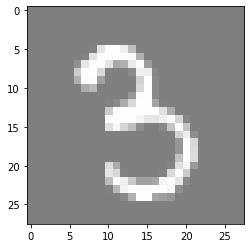

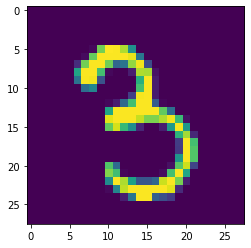

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow (img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy ()
    plt.imshow (np.transpose (npimg, (1, 2, 0)))
    plt.show ()

# get some random training images
dataiter = iter (trainloader)
images, labels = dataiter.next ()

# show images
imshow (torchvision.utils.make_grid (images[1]))
plt.imshow(images[1].numpy().squeeze());

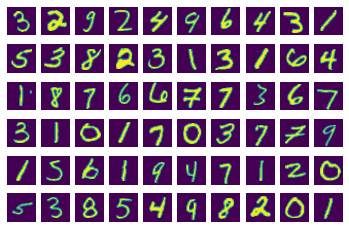

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range (1, num_of_images + 1):
    plt.subplot (6, 10, index)
    plt.axis ('off')
    plt.imshow (images[index].numpy().squeeze())

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d (in_channels = 1, out_channels = 10, kernel_size = 3, stride = 1, padding = 0) #26
        self.bn1=nn.BatchNorm2d (10)
        self.dropout1=nn.Dropout2d(p=0.1)

        self.conv2 = nn.Conv2d (in_channels = 10, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #24
        self.bn2=nn.BatchNorm2d (16)
        self.dropout2=nn.Dropout2d(p=0.1)

        self.conv3 = nn.Conv2d (in_channels = 16, out_channels = 10, kernel_size = 1, stride = 1, padding = 0)  #24
        self.pool1 = nn.MaxPool2d (2, 2) # max pool 12
        
        self.conv4 = nn.Conv2d (in_channels = 10, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #10
        self.bn4=nn.BatchNorm2d (16)
        self.dropout4=nn.Dropout2d(p=0.1)

        self.conv5 = nn.Conv2d (in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #8
        self.bn5=nn.BatchNorm2d (16)
        self.dropout5=nn.Dropout2d(p=0.1)

        self.conv6 = nn.Conv2d (in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #6
        self.bn6=nn.BatchNorm2d (16)
        self.dropout6=nn.Dropout2d(p=0.1)

        self.conv7 = nn.Conv2d (in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #4
        self.bn7=nn.BatchNorm2d (16)
        self.dropout7=nn.Dropout2d(p=0.1)

        self.conv8 = nn.Conv2d (in_channels = 16, out_channels = 10, kernel_size = 4, stride = 1, padding = 0)  #1
        self.bn8=nn.BatchNorm2d (10)
        self.dropout8=nn.Dropout2d(p=0.1)

        self.linear = nn.Linear (in_features = 10, out_features = 10)

    def forward (self, x):
        x = F.relu (self.dropout1(self.bn1(self.conv1 (x))))
        x = F.relu (self.dropout2(self.bn2(self.conv2 (x))))
        x = F.relu (self.pool1(self.conv3 (x)))
        x = F.relu (self.dropout4(self.bn4(self.conv4 (x))))
        x = F.relu (self.dropout5(self.bn5(self.conv5 (x))))
        x = F.relu (self.dropout6(self.bn6(self.conv6 (x))))
        x = F.relu (self.dropout7(self.bn7(self.conv7 (x))))
        x = F.relu (self.dropout8(self.bn8(self.conv8 (x))))
        #x = self.conv3 (x)

        x = x.reshape (-1, 10 * 1 * 1)
        x = self.linear (x)
        #x = F.softmax (x, dim = 0)
        return x

net = Net()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)
net.to (device)

cuda


Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout2d(p=0.1, inplace=False)
  (conv3): Conv2d(16, 10, kernel_size=(1, 1), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout2d(p=0.1, inplace=False)
  (conv5): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout5): Dropout2d(p=0.1, inplace=False)
  (conv6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (b

In [8]:
pytorch_total_params = sum(p.numel() for p in net.parameters())
print (pytorch_total_params)

13022


In [9]:
import time
import torch.optim as optim
from tqdm import notebook

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.003)
epochs = 15

tqdm_e = notebook.tqdm ([i + 1 for i in range (epochs)], total = epochs)
for i, e in enumerate (tqdm_e):
    time0 = time.time ()

    running_loss = 0
    print ('Training for Epoch ' + str (e) + '...')
    tqdm_tl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in (tqdm_tl):
    #for images, labels in trainloader:
        # Training pass
        optimizer.zero_grad()
        
        output = net (images.cuda())
        loss = criterion (output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()

    correct_count, all_count = 0, 0
    print ('Computing Accuracy on Training set...')
    tqdm_vl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in tqdm_vl:
      true_label = labels.numpy()
      with torch.no_grad():
          logps = net (images.cuda())

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      for j in range (ps.shape[0]):
        probab = list (ps.cpu().numpy()[j])
        pred_label = probab.index(max(probab))
        if (true_label[j] == pred_label):
          correct_count += 1
        all_count += 1
    train_acc = correct_count / all_count

    print ('Computing Accuracy on Test set...')
    correct_count, all_count = 0, 0
    tqdm_vl = notebook.tqdm (testloader, total = int (len (testloader)))
    for images, labels in tqdm_vl:
      true_label = labels.numpy()
      with torch.no_grad():
          logps = net (images.cuda())

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      for j in range (ps.shape[0]):
        probab = list (ps.cpu().numpy()[j])
        pred_label = probab.index(max(probab))
        if (true_label[j] == pred_label):
          correct_count += 1
        all_count += 1
    test_acc = correct_count / all_count

    print("Epoch {} - Time Taken: {}, Training loss: {} - Train Accuracy: {} Test Accuracy: {}".format(e, (time.time ()-time0)/60, running_loss/len(trainloader), train_acc, test_acc))
    if correct_count / all_count > 0.98:
      optimizer = optim.Adam(net.parameters(), lr = 0.0001)

Training for Epoch 1...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 1 - Time Taken: 0.599612045288086, Training loss: 0.4838647756145707 - Train Accuracy: 0.9328333333333333 Test Accuracy: 0.936
Training for Epoch 2...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 2 - Time Taken: 0.6045995990435282, Training loss: 0.19570663996708038 - Train Accuracy: 0.94315 Test Accuracy: 0.9462
Training for Epoch 3...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 3 - Time Taken: 0.5994991779327392, Training loss: 0.16997992096822273 - Train Accuracy: 0.9520333333333333 Test Accuracy: 0.9561
Training for Epoch 4...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 4 - Time Taken: 0.5997069557507833, Training loss: 0.15046640229957509 - Train Accuracy: 0.9577333333333333 Test Accuracy: 0.962
Training for Epoch 5...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 5 - Time Taken: 0.6050486445426941, Training loss: 0.1392308953803962 - Train Accuracy: 0.9609333333333333 Test Accuracy: 0.9625
Training for Epoch 6...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 6 - Time Taken: 0.6010972499847412, Training loss: 0.13107232898791463 - Train Accuracy: 0.9614 Test Accuracy: 0.9616
Training for Epoch 7...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 7 - Time Taken: 0.6013721386591594, Training loss: 0.12651770970801998 - Train Accuracy: 0.9641 Test Accuracy: 0.9658
Training for Epoch 8...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 8 - Time Taken: 0.6034727176030477, Training loss: 0.11787874124912438 - Train Accuracy: 0.9638333333333333 Test Accuracy: 0.9641
Training for Epoch 9...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 9 - Time Taken: 0.6024279594421387, Training loss: 0.11762616442425101 - Train Accuracy: 0.9655833333333333 Test Accuracy: 0.9674
Training for Epoch 10...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 10 - Time Taken: 0.6059091885884603, Training loss: 0.1142432174957129 - Train Accuracy: 0.9682166666666666 Test Accuracy: 0.9682
Training for Epoch 11...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 11 - Time Taken: 0.6068260510762532, Training loss: 0.11026211392118541 - Train Accuracy: 0.9684666666666667 Test Accuracy: 0.9705
Training for Epoch 12...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 12 - Time Taken: 0.6030773440996806, Training loss: 0.1078491077831845 - Train Accuracy: 0.9696666666666667 Test Accuracy: 0.9688
Training for Epoch 13...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 13 - Time Taken: 0.6048116366068522, Training loss: 0.10308985153574553 - Train Accuracy: 0.9696333333333333 Test Accuracy: 0.972
Training for Epoch 14...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 14 - Time Taken: 0.6033871889114379, Training loss: 0.10369200486816894 - Train Accuracy: 0.9710333333333333 Test Accuracy: 0.9708
Training for Epoch 15...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 15 - Time Taken: 0.5978728175163269, Training loss: 0.09814681970417055 - Train Accuracy: 0.9704166666666667 Test Accuracy: 0.9712

